# Predicting house prices using Linear Regression

Plan is create a linear regression model that can predict housing prices. 

## Data set used

London housing prices data from 2018

## Part 1 Feature discovery

In this notebook my only goal is to  discover features that we will use to train the model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

### Read Data

In [2]:
df = pd.read_csv('data/london_house_price_2018.csv')
df.head()


,fullAddress,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,price
0,"Flat 1, White Rose Court, Widegate Street, Lon...",E1 7ES,E1,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,D,623000
1,"Flat 5, White Rose Court, Widegate Street, Lon...",E1 7ES,E1,51.517972,-0.078028,1.0,2.0,50.0,1.0,Leasehold,Converted Flat,E,575000
2,"9A Petticoat Tower, Petticoat Square, London, ...",E1 7EE,E1,51.515798,-0.077081,1.0,2.0,72.0,2.0,Leasehold,Purpose Built Flat,C,385000
3,"Flat 11, Arcadia Court, 45 Old Castle Street, ...",E1 7NY,E1,51.516568,-0.074793,1.0,1.0,42.0,1.0,Leasehold,Purpose Built Flat,D,370000
4,"Flat 18, Arcadia Court, 45 Old Castle Street, ...",E1 7NY,E1,51.516568,-0.074793,1.0,1.0,39.0,1.0,Leasehold,Purpose Built Flat,C,364000


### Explore Features

Lets start by lookin at the data frame.

In [9]:
df.info()
print("==="*40)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80703 entries, 0 to 80702
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fullAddress          80703 non-null  object 
 1   postcode             80703 non-null  object 
 2   outcode              80703 non-null  object 
 3   latitude             80703 non-null  float64
 4   longitude            80703 non-null  float64
 5   bathrooms            80703 non-null  float64
 6   bedrooms             80703 non-null  float64
 7   floorAreaSqM         80703 non-null  float64
 8   livingRooms          80703 non-null  float64
 9   tenure               80703 non-null  object 
 10  propertyType         80703 non-null  object 
 11  currentEnergyRating  80703 non-null  object 
 12  price                80703 non-null  int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 8.0+ MB


,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,price
count,80703.000000,80703.000000,80703.000000,80703.000000,80703.000000,80703.000000,8.070300e+04
mean,51.510763,-0.100986,1.459723,2.615987,104.325775,1.338438,8.147179e+05
std,0.060479,0.094307,0.724896,1.192496,56.755678,0.607027,9.521640e+05
min,51.385708,-0.347055,1.000000,1.000000,11.000000,1.000000,1.000000e+04
25%,51.463511,-0.165706,1.000000,2.000000,66.000000,1.000000,4.000000e+05
50%,51.501570,-0.101248,1.000000,2.000000,90.000000,1.000000,5.670000e+05
75%,51.558484,-0.035188,2.000000,3.000000,124.000000,2.000000,8.880000e+05
max,51.665823,0.139249,9.000000,9.000000,500.000000,7.000000,3.750000e+07


In [12]:
# Numerical Features look interesting for correlation analysis
numerical_features = df.select_dtypes(include=[np.number, 'float64', 'int64']).columns.to_list()
numerical_features

['latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'floorAreaSqM',
 'livingRooms',
 'price']

<Figure size 500x500 with 0 Axes>

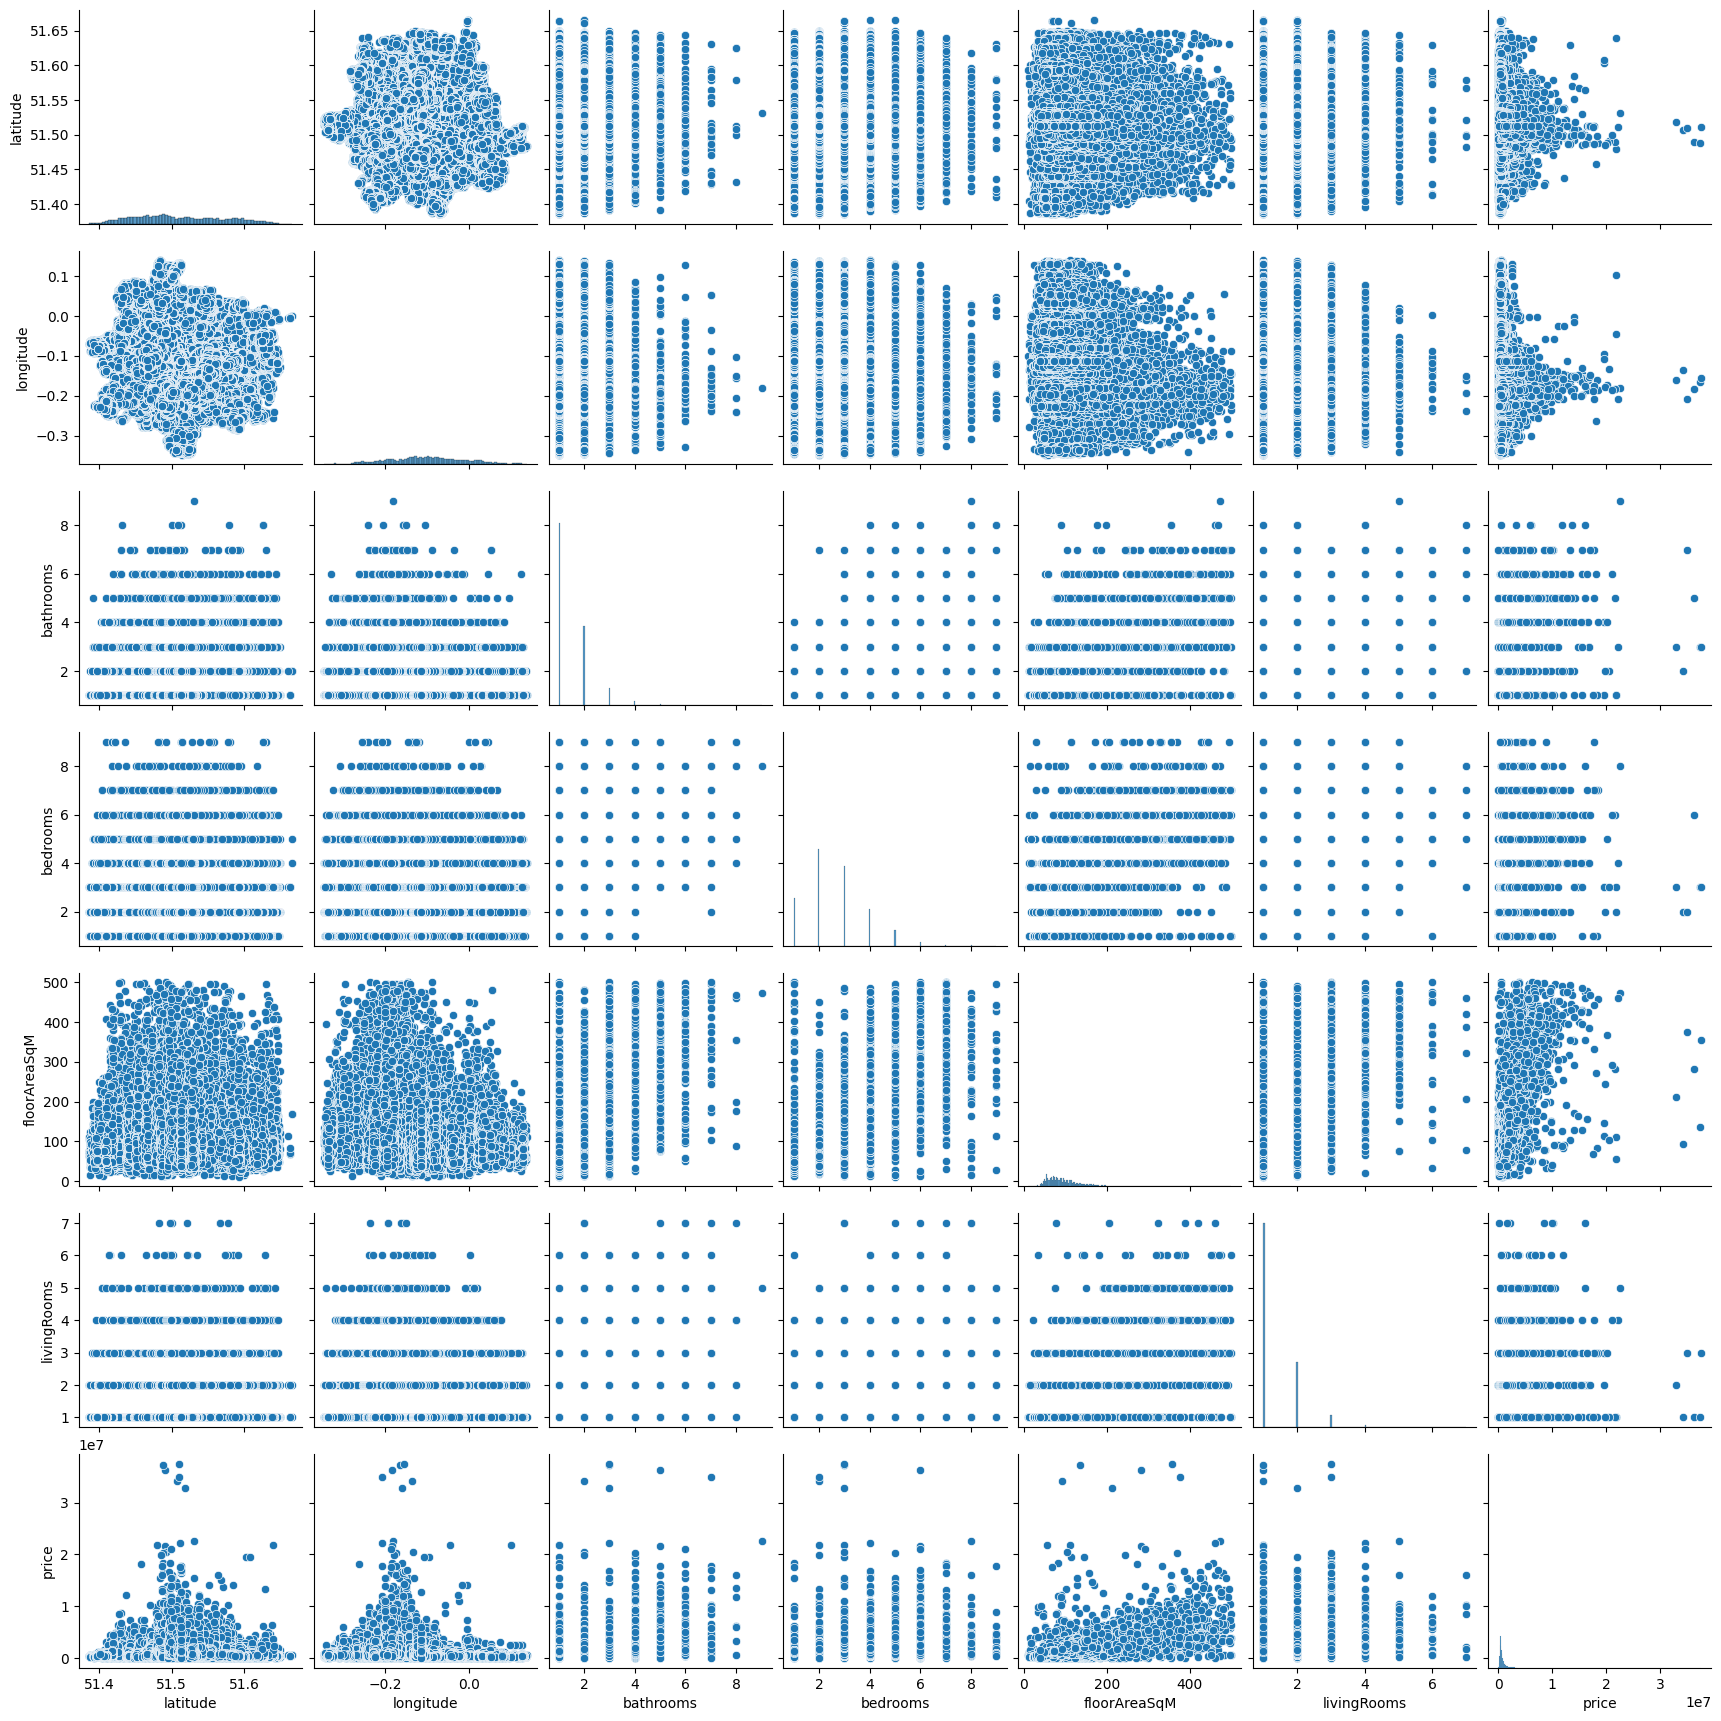

In [14]:
plt.figure(figsize=(5, 5))
axes = sns.pairplot(df[numerical_features])

**Observation**
- latitude and longitude seem to have higher price for certain regions, I think linear regression might not be able to capture this instead get confused
- floor area is showing an increasing realtion with price.

This is still not conclusive moving to correlation

In [15]:
df[numerical_features].corr()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,price
latitude,1.000000,-0.051308,0.038546,0.037725,0.042568,0.070444,0.008352
longitude,-0.051308,1.000000,-0.207145,-0.086213,-0.165193,-0.055058,-0.234584
bathrooms,0.038546,-0.207145,1.000000,0.557272,0.663587,0.375192,0.550484
bedrooms,0.037725,-0.086213,0.557272,1.000000,0.802344,0.542835,0.429837
floorAreaSqM,0.042568,-0.165193,0.663587,0.802344,1.000000,0.626097,0.646681
livingRooms,0.070444,-0.055058,0.375192,0.542835,0.626097,1.000000,0.383612
price,0.008352,-0.234584,0.550484,0.429837,0.646681,0.383612,1.000000


longitude and latitude are not capture with correlation but floorAreqSqm is still a `postive` correlation

### Basic Linear Model


In [20]:
Y = df['price']
X = sm.add_constant(df['floorAreaSqM'])

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 5.801e+04
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:00:43   Log-Likelihood:            -1.2037e+06
No. Observations:               80703   AIC:                         2.407e+06
Df Residuals:                   80701   BIC:                         2.407e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.171e+05   5349.807    -59.277   

<Axes: xlabel='floorAreaSqM', ylabel='price'>

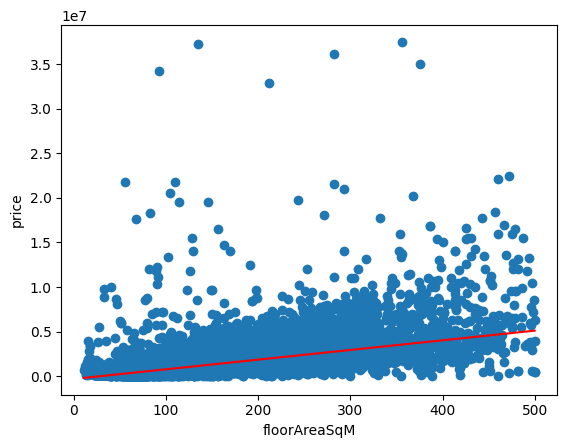

In [21]:
m = results.params["floorAreaSqM"]
b = results.params["const"]

plt.scatter(df["floorAreaSqM"], df["price"])

line = m * df["floorAreaSqM"] + b

plt.ylabel("price")

sns.lineplot(x=df["floorAreaSqM"], y=line, color="red")